console.txt

```
0: [31719.00, 33052.00, 30655.00, 29834.00, 31921.00, 31704.00, 29493.00, 31121.00, 32630.00, 30279.00, 29983.00, 32571.00, 31457.00, 29089.00, 31324.00, 32383.00]
1: [1289.83, 1571.46, 1191.52, 1284.93, 1485.04, 1100.76, 1856.35, 888.37, 2076.86, 803.43, 2292.47, 749.66, 2007.09, 888.54, 1788.86, 1095.81]
2: [4048.19, 3632.96, 4201.09, 3717.78, 4246.75, 3776.73, 3997.60, 4007.42, 3783.30, 4167.25, 3639.40, 4416.80, 3527.53, 4654.50, 3498.63, 4799.78]
3: [4681.64, 3504.76, 4586.47, 3379.78, 4581.97, 3500.48, 4581.76, 3732.13, 4495.86, 3861.64, 4516.18, 3993.66, 4402.73, 4149.30, 4239.61, 4332.50]
4: [1303.78, 1363.06, 1468.58, 1487.09, 1325.71, 1619.45, 1130.65, 1714.51, 947.84, 1768.40, 745.58, 1773.36, 816.03, 1732.58, 1092.46, 1684.32]
5: [573.82, 1240.97, 372.65, 1151.74, 658.99, 1069.12, 842.81, 881.24, 1068.13, 611.77, 1149.24, 527.91, 1216.00, 207.38, 1285.50, 91.26]
6: [1076.32, 260.30, 1167.03, 292.41, 1132.41, 135.89, 1074.38, 256.83, 992.97, 565.20, 699.58, 781.31, 538.20, 991.23, 207.03, 1109.89]
7: [1064.32, 1358.14, 1019.62, 1524.31, 928.31, 1738.32, 995.49, 1796.58, 1166.52, 1815.99, 1165.46, 1830.94, 1106.45, 1724.33, 960.77, 1575.60]
8: [1635.64, 1000.61, 1441.83, 1070.43, 1596.66, 1296.91, 1697.55, 1513.38, 1710.57, 1622.56, 1614.79, 1741.15, 1447.55, 1685.47, 1356.56, 1646.95]
9: [329.88, 736.64, 674.70, 711.67, 408.25, 472.12, 179.19, 338.21, 66.15, 497.79, 343.64, 641.17, 564.64, 730.68, 706.83, 814.76]
10: [576.90, 620.98, 681.41, 598.96, 595.72, 543.89, 430.32, 335.15, 316.95, 145.08, 140.52, 115.93, 211.71, 335.53, 483.62, 525.62]
11: [447.49, 446.61, 486.76, 570.59, 503.61, 654.23, 656.30, 531.87, 650.44, 448.98, 449.02, 265.10, 304.42, 56.22, 185.08, 171.20]
12: [508.28, 529.83, 521.05, 621.49, 492.85, 596.30, 607.13, 494.47, 878.12, 594.36, 964.14, 857.59, 1016.67, 1030.73, 873.48, 1055.65]
13: [933.58, 708.55, 696.22, 570.58, 939.82, 576.42, 1062.33, 769.99, 1036.56, 950.46, 972.35, 1061.85, 889.51, 1041.82, 960.18, 1006.75]
14: [498.17, 477.13, 247.44, 481.09, 398.80, 362.63, 501.90, 132.47, 455.12, 143.29, 375.06, 355.47, 111.11, 452.27, 148.68, 478.74]
15: [197.40, 431.20, 42.29, 396.26, 213.22, 361.58, 224.84, 226.60, 363.68, 99.26, 393.91, 272.73, 236.17, 425.19, 53.49, 436.93]
...
```

## Maximum des Frequency Sweeps auswerten

In [ ]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

SAMPLE_FREQUENCY = 200 * 1000 # 200 kHz
SAMPLE_COUNT = 512

# Set figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

# Read file "console.txt"
with open("console.txt", mode="rt") as file:
    k: list[int] = []
    data: list[list[float]] = []

    # Iterate over lines and extract data
    for line in file.readlines():
        k.append(int(line.split(':')[0]))
        dataStr = line[line.index('[') + 1 : line.index(']')].split(',')

        # Initialize data once
        if len(data) < 1:
            data = [[] for i in range(len(dataStr))]

        # Parse floats
        for i, ds in enumerate(dataStr):
            data[i].append( float(dataStr[i]) )

    # Plot the results
    for d in data:
        plt.plot(k, d)

    # Find Peaks
    for i in range(0, len(data)):
        peaks, a = find_peaks(data[i], 10000)
        print(str(i) + str(peaks))

freqs = fftfreq(SAMPLE_COUNT, 1/SAMPLE_FREQUENCY)
print(str(freqs))

In [ ]:
from numpy import arange, empty

def fftfreq(n, d=1.0):
    """The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).
    
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    """
    val = 1.0 / (n * d)
    results = empty(n, int)
    N = (n-1)//2 + 1
    p1 = arange(0, N, dtype=int)
    results[:N] = p1
    p2 = arange(-(n//2), 0, dtype=int)
    results[N:] = p2
    return results * val

## Experiment with captured data

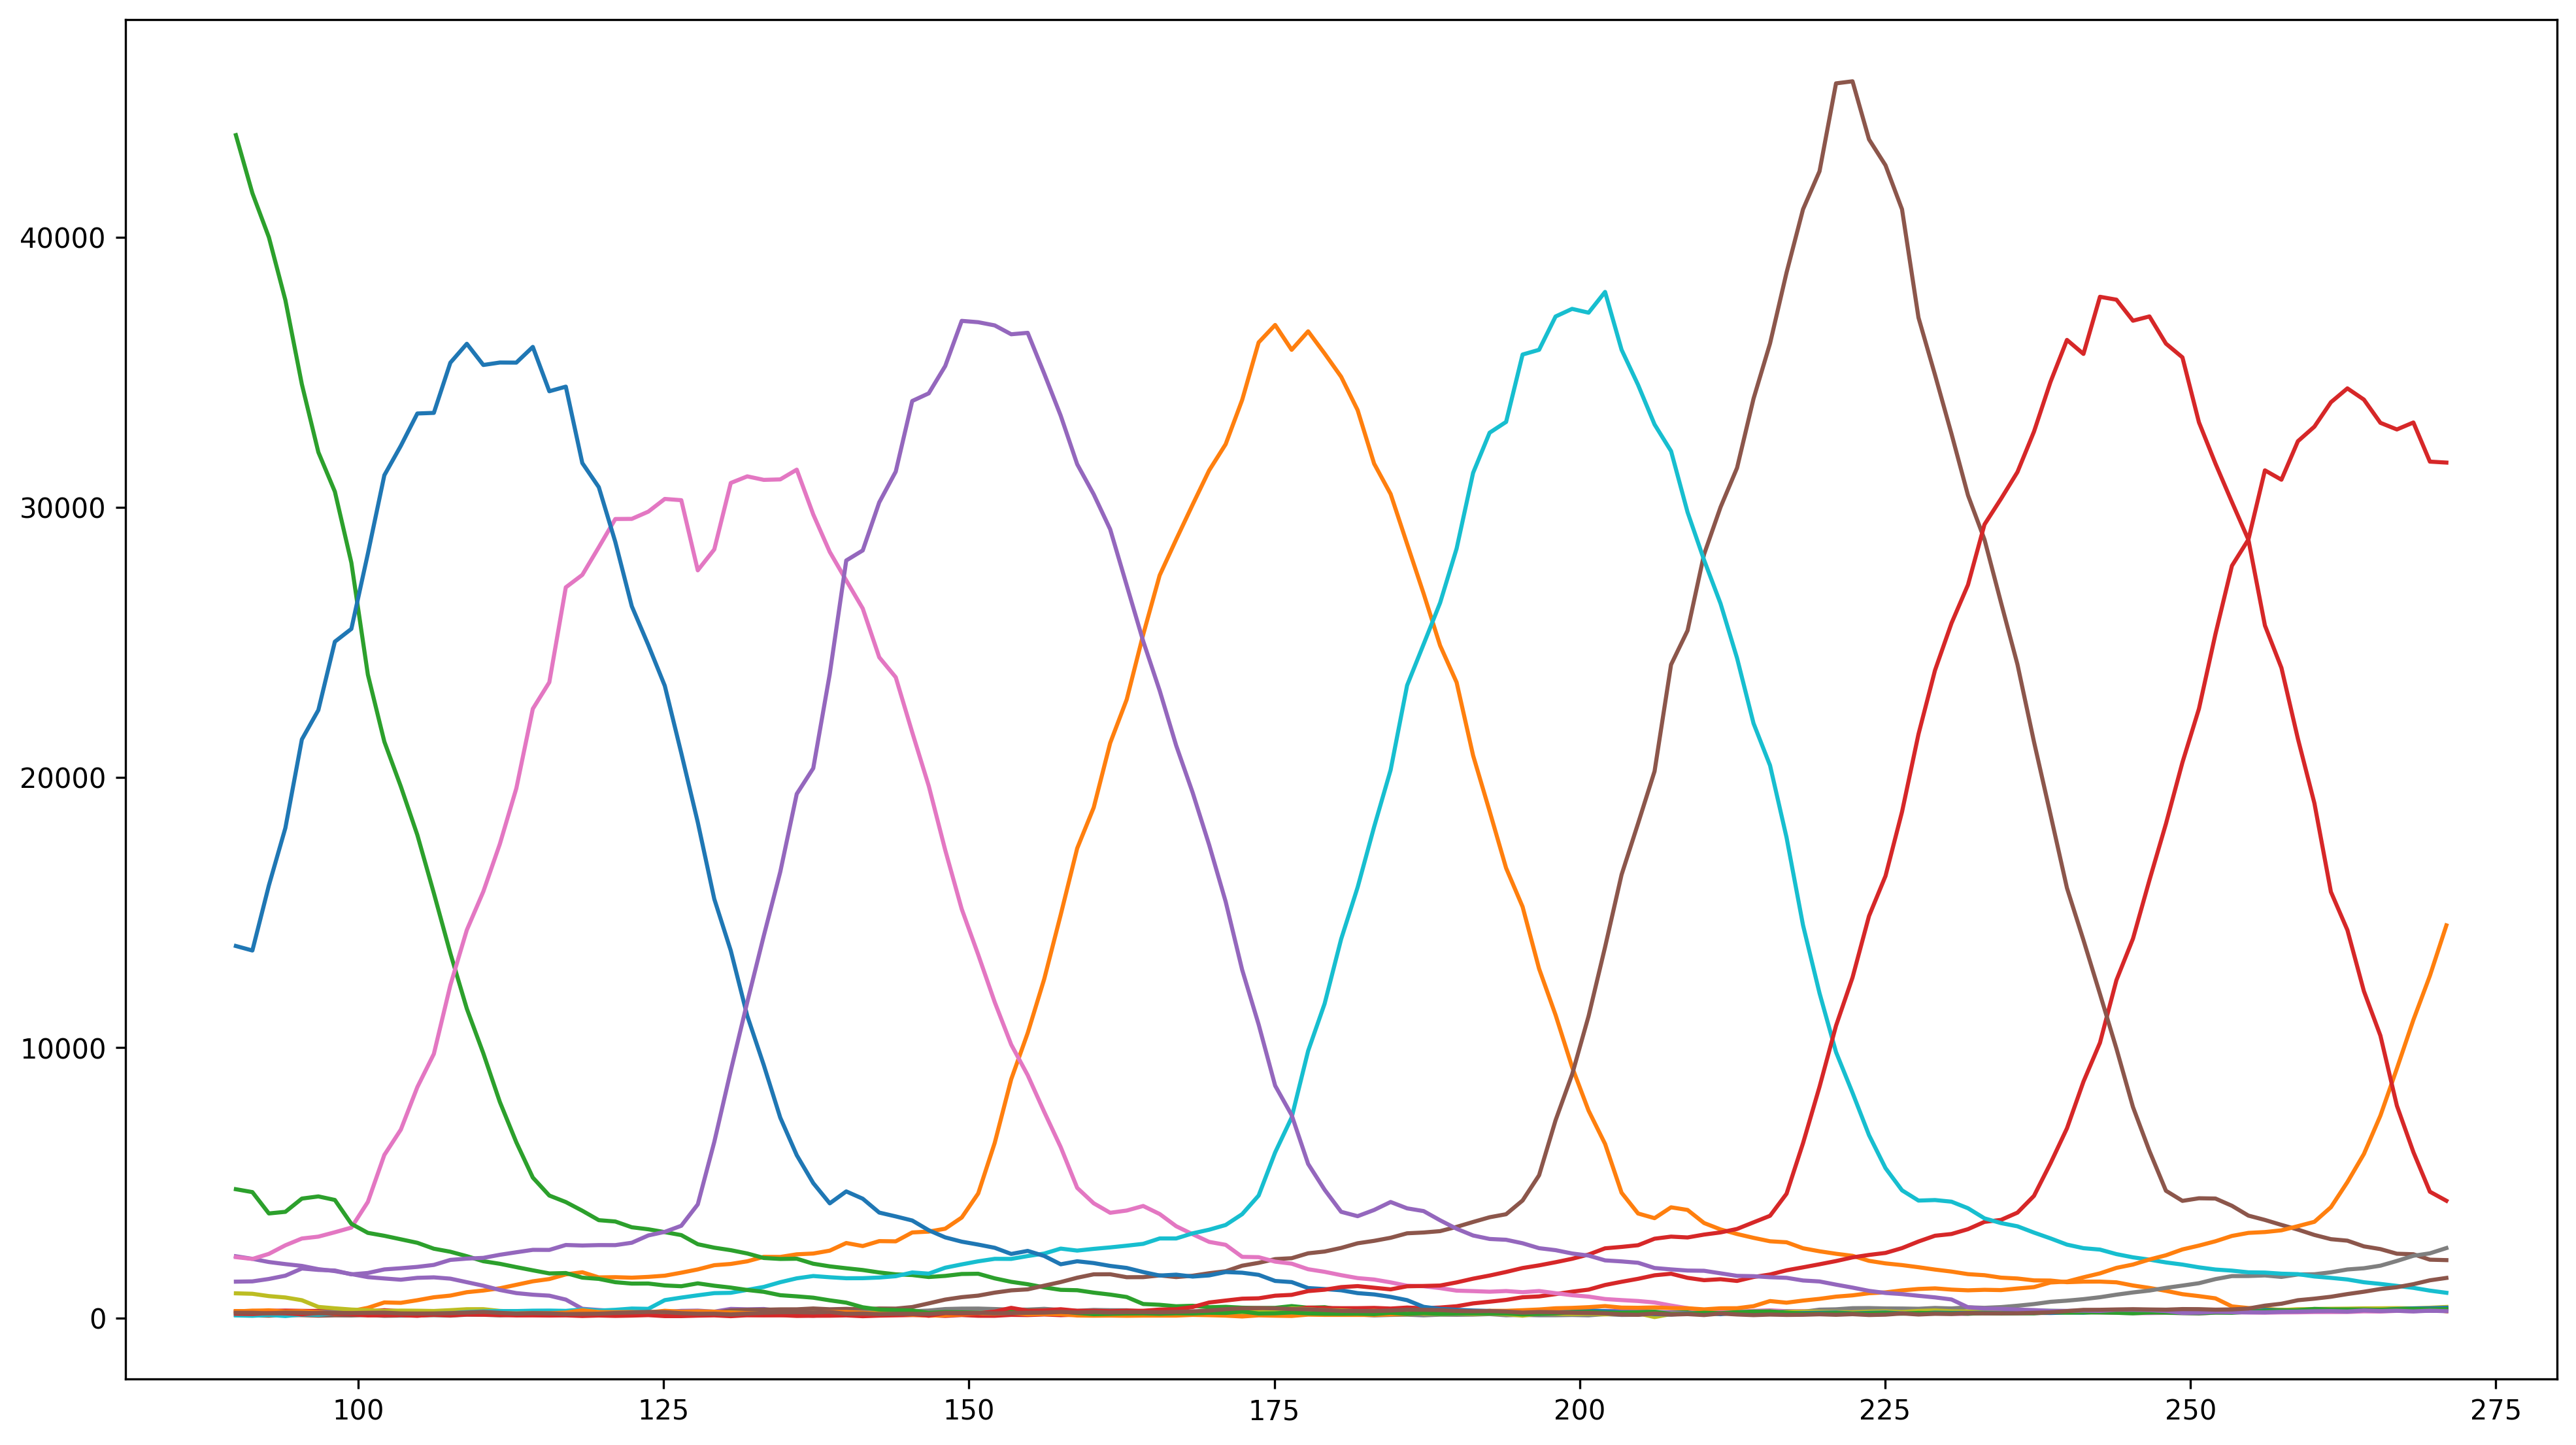

In [2]:
import scipy.io
import matplotlib.pyplot as plt

SERVO_LIMITS = [500, 1833]
SERVO_ANGLES = [90, 270]
STEP_SIZE = 10

#FILENAME = 'sensorSweepBartlettWindow.mat'
FILENAME = 'sensorSweepNoWindow.mat'

# Set figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

mat_data = scipy.io.loadmat(FILENAME)
channel_magnitudes = mat_data['data']
steps = mat_data['steps']
angles = mat_data['degrees'].transpose()
#metadata = mat_data['metadata']

plt.plot(angles, channel_magnitudes)
